# My Attempt without following the assignment 

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
# Loading the Datasets
df = pd.read_csv('local_dataset.csv')
df2 = pd.read_csv('kaggle_dataset.csv')

In [ ]:
df2_id = df2['Id']


In [ ]:
df.head()

,Id,HR,interval in seconds,NNRR,AVNN,SDNN,RMSSD,pNN50,TP,ULF,VLF,LF,HF,LF_HF,stress
0,1001,108.329447,0.668183,0.979203,0.666800,0.006600,0.003200,0.005000,NaN,0.0,NaN,NaN,NaN,NaN,0.0
1,1002,91.074128,0.666800,0.979203,0.666800,0.006600,0.003200,0.005000,NaN,0.0,NaN,NaN,NaN,NaN,0.0
2,1003,92.201787,0.666800,0.979203,0.666800,0.006600,0.003200,0.005000,NaN,0.0,NaN,NaN,NaN,NaN,0.0
3,1004,94.776255,0.666800,0.979203,0.666800,0.006600,0.003200,0.005000,NaN,0.0,NaN,NaN,NaN,NaN,0.0
4,1005,NaN,0.676691,0.978741,0.676911,0.030424,0.012999,0.027727,0.000548,0.0,0.000863,0.000292,0.000033,8.79347,0.0


In [ ]:
# Renaming the Column for ease of use 
df.rename(columns={"interval in seconds": "interval_seconds"}, inplace=True)
df2.rename(columns={"interval in seconds": "interval_seconds"}, inplace=True)

# Dropping useless Columns
#df = df.drop('LF_HF',  axis=1)
df = df.drop('Id',  axis=1)
#df2 = df2.drop('LF_HF', axis=1)
df2 = df2.drop('Id', axis=1)

# Replacing the inf values to Null Values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
'''
 Printing the Column names, size of Columns and checking if there are any
 remaining Null values
'''

print(df.columns)
print()
print(df2.columns)
print()
print('df: ', df.shape)
print()
print('df2: ',df2.shape)
print()
print(df.isnull().sum())
print()
print(df2.isnull().sum())

Index(['HR', 'interval_seconds', 'NNRR', 'AVNN', 'SDNN', 'RMSSD', 'pNN50',
       'TP', 'ULF', 'VLF', 'LF', 'HF', 'LF_HF', 'stress'],
      dtype='object')

Index(['HR', 'interval_seconds', 'NNRR', 'AVNN', 'SDNN', 'RMSSD', 'pNN50',
       'TP', 'ULF', 'VLF', 'LF', 'HF', 'LF_HF'],
      dtype='object')

df:  (3129, 14)

df2:  (1000, 13)

HR                   109
interval_seconds       0
NNRR                  58
AVNN                  74
SDNN                  90
RMSSD                  0
pNN50                  0
TP                   236
ULF                  140
VLF                   96
LF                    96
HF                    96
LF_HF               3081
stress                 0
dtype: int64

HR                    0
interval_seconds      0
NNRR                  0
AVNN                  0
SDNN                 32
RMSSD                 0
pNN50                 0
TP                   87
ULF                  56
VLF                  31
LF                   31
HF                   31
LF_HF    

In [ ]:
# Using For loop to replace all Null values with the median of the column
# while also replacing the test dataset with the median of the train dataset
columns = ['HR', 'NNRR', 'AVNN','SDNN', 'TP', 'ULF', 'VLF', 'LF', 'HF', 'LF_HF']
for col in columns:
    median = df[col].median()
    df[col].fillna(median, inplace=True)
    df2[col].fillna(median, inplace=True)

print('df: ', df.shape)
print()
print('df2: ',df2.shape)
print()
print(df.isnull().sum())
print()
print(df2.isnull().sum())

df:  (3129, 14)

df2:  (1000, 13)

HR                  0
interval_seconds    0
NNRR                0
AVNN                0
SDNN                0
RMSSD               0
pNN50               0
TP                  0
ULF                 0
VLF                 0
LF                  0
HF                  0
LF_HF               0
stress              0
dtype: int64

HR                  0
interval_seconds    0
NNRR                0
AVNN                0
SDNN                0
RMSSD               0
pNN50               0
TP                  0
ULF                 0
VLF                 0
LF                  0
HF                  0
LF_HF               0
dtype: int64


In [ ]:
df2.head()

,HR,interval_seconds,NNRR,AVNN,SDNN,RMSSD,pNN50,TP,ULF,VLF,LF,HF,LF_HF
0,95.135158,0.890853,0.974164,0.889935,0.096018,0.046200,0.032778,0.105342,0.105342,0.00064,0.0,0.0,3.272245
1,82.564200,0.628600,0.980480,0.629127,0.085506,0.040439,0.025833,0.104875,0.104875,0.00064,0.0,0.0,3.272245
2,90.010889,0.944939,0.972702,0.943657,0.121277,0.058594,0.034412,0.166643,0.166643,0.00064,0.0,0.0,3.272245
3,81.102854,0.811532,0.976090,0.811925,0.049806,0.023856,0.030641,0.026524,0.026524,0.00064,0.0,0.0,3.272245
4,89.572000,0.844262,0.974839,0.843826,0.050792,0.024407,0.032027,0.025992,0.025992,0.00064,0.0,0.0,3.272245


## Normalization

In [ ]:
df.head()

,HR,interval_seconds,NNRR,AVNN,SDNN,RMSSD,pNN50,TP,ULF,VLF,LF,HF,LF_HF,stress
0,108.329447,0.668183,0.979203,0.666800,0.006600,0.003200,0.005000,0.030690,0.0,0.000640,0.000000,0.000000,3.272245,0.0
1,91.074128,0.666800,0.979203,0.666800,0.006600,0.003200,0.005000,0.030690,0.0,0.000640,0.000000,0.000000,3.272245,0.0
2,92.201787,0.666800,0.979203,0.666800,0.006600,0.003200,0.005000,0.030690,0.0,0.000640,0.000000,0.000000,3.272245,0.0
3,94.776255,0.666800,0.979203,0.666800,0.006600,0.003200,0.005000,0.030690,0.0,0.000640,0.000000,0.000000,3.272245,0.0
4,83.305717,0.676691,0.978741,0.676911,0.030424,0.012999,0.027727,0.000548,0.0,0.000863,0.000292,0.000033,8.793470,0.0


In [ ]:
corr = df.corr()

In [ ]:
corr['stress']

HR                  0.246806
interval_seconds   -0.208182
NNRR                0.171590
AVNN               -0.204842
SDNN               -0.037625
RMSSD              -0.007179
pNN50              -0.019107
TP                 -0.017558
ULF                -0.017962
VLF                 0.016449
LF                  0.035222
HF                  0.041909
LF_HF              -0.017645
stress              1.000000
Name: stress, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
target_column = 'stress'

# drop the target column
X = df.drop(target_column, axis=1)
X2 = df2

# normalize the dataset
X = X.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
X2 = X2.apply(lambda x: (x - x.min()) / (x.max() - x.min()))


## Train Test Split. 80/20

In [ ]:
# [:] All rows included [,:-1] All columns included except for the last one
X = df.iloc[:,:-1]

In [ ]:
X.shape

(3129, 13)

In [ ]:
X.head()

,HR,interval_seconds,NNRR,AVNN,SDNN,RMSSD,pNN50,TP,ULF,VLF,LF,HF,LF_HF
0,0.272231,0.231260,0.746810,0.228993,8.846869e-08,0.000000,0.000000,0.092931,0.0,0.000000,0.00000,0.000000,0.340745
1,0.221806,0.228560,0.746810,0.228993,8.846869e-08,0.000000,0.000000,0.092931,0.0,0.000000,0.00000,0.000000,0.340745
2,0.225102,0.228560,0.746810,0.228993,8.846869e-08,0.000000,0.000000,0.092931,0.0,0.000000,0.00000,0.000000,0.340745
3,0.232625,0.228560,0.746810,0.228993,8.846869e-08,0.000000,0.000000,0.092931,0.0,0.000000,0.00000,0.000000,0.340745
4,0.199105,0.247873,0.704397,0.248811,1.447605e-01,0.121006,0.088384,0.001551,0.0,0.006257,0.47433,0.127099,1.000000


In [ ]:
y = df['stress']

In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: stress, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2503, 13)
(2503,)
(626, 13)
(626,)


## Model Adaboost Classifier 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model1 = AdaBoostClassifier()
model1.fit(X_train, y_train)

AdaBoostClassifier()

## Evaluation 

In [ ]:
print('train score', model1.score(X_train, y_train))
print('test score', model1.score(X_test,y_test))

train score 0.5900918897323212
test score 0.5559105431309904


In [ ]:
# Evaluate the model on the training data set 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = model1.predict(X_train)
print(classification_report(y_train, pred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_train, pred))
print()
print('Accuracy: ', accuracy_score(y_train, pred))

              precision    recall  f1-score   support

         0.0       0.67      0.56      0.61       693
         1.0       0.57      0.80      0.66      1198
         2.0       0.57      0.22      0.32       612

    accuracy                           0.59      2503
   macro avg       0.60      0.53      0.53      2503
weighted avg       0.60      0.59      0.56      2503


Confusion Matrix: 
 [[386 292  15]
 [154 955  89]
 [ 34 442 136]]

Accuracy:  0.5900918897323212


In [ ]:
# Evaluate the model on the testing data set 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = model1.predict(X_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print()
print('Accuracy: ', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.63      0.57      0.60       161
         1.0       0.56      0.76      0.64       304
         2.0       0.38      0.15      0.21       161

    accuracy                           0.56       626
   macro avg       0.52      0.49      0.49       626
weighted avg       0.53      0.56      0.52       626


Confusion Matrix: 
 [[ 92  62   7]
 [ 40 232  32]
 [ 13 124  24]]

Accuracy:  0.5559105431309904


# Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif


kbest = SelectKBest(mutual_info_classif, k = 5)
selectfeature = kbest.fit(X_train, y_train)

from numpy.lib.function_base import select
X_train.columns[selectfeature.get_support()]

Index(['interval_seconds', 'NNRR', 'AVNN', 'SDNN', 'RMSSD'], dtype='object')

In [ ]:
X_train_selected = kbest.transform(X_train)
X_test_selected = kbest.transform(X_test)

model = AdaBoostClassifier()
model.fit(X_train_selected, y_train)

accuracy = model.score(X_test_selected, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.560702875399361


In [ ]:
X1 = X

In [ ]:
X1.head(1)

,HR,interval_seconds,NNRR,AVNN,SDNN,RMSSD,pNN50,TP,ULF,VLF,LF,HF,LF_HF
0,0.272231,0.23126,0.74681,0.228993,8.846869e-08,0.0,0.0,0.092931,0.0,0.0,0.0,0.0,0.340745


In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.20)

In [ ]:
X1_train.head(1)

,HR,interval_seconds,NNRR,AVNN,SDNN,RMSSD,pNN50,TP,ULF,VLF,LF,HF,LF_HF
1059,0.199105,0.265225,0.660057,0.266636,0.182278,0.173107,0.180878,0.014853,0.014963,0.0,0.0,0.0,0.340745


## Random Forest Model

In [ ]:
# Using the Randomized Search 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

def rf_model(X1_train, X1_test, y1_train, y1_test):
    # Define the model
    rfc = RandomForestClassifier()
    
    # Define the range of values for each hyperparameter
    param_dist = {'n_estimators': np.arange(10, 401, 50),
                  'max_depth': [None, 5, 10, 12, 14],
                  'min_samples_split': np.arange(2, 15, 2)}
    
    # Create the RandomizedSearchCV object
    random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=0)
    
    # Fit the RandomizedSearchCV object to the data
    random_search.fit(X1_train, y1_train)
    
    # Print the best hyperparameters
    print("Best parameters: ",random_search.best_params_)
    
    # Print the best score
    print("Best score: ",random_search.best_score_)
    
    # Use the best hyperparameters to create the final model
    model_rf1 = RandomForestClassifier(**random_search.best_params_)
    model_rf1.fit(X1_train, y1_train)
    y_pred1 = model_rf1.predict(X1_test)
    return model_rf1, y_pred1

model_rf1, y_pred1 = rf_model(X1_train, X1_test, y1_train, y1_test)


Best parameters:  {'n_estimators': 160, 'min_samples_split': 12, 'max_depth': 10}
Best score:  0.602488622754491


In [ ]:
# Using Grid Seaarch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def rf_model(X1_train, X1_test, y1_train, y1_test):
    # Define the model
    rfc = RandomForestClassifier()
    
    # Define the range of values for each hyperparameter
    param_grid = {'n_estimators': [10, 50, 100, 200, 400],
                  'max_depth': [None, 5, 10, 12, 14],
                  'min_samples_split': [2, 5, 10, 12, 14]}
    
    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')
    
    # Fit the GridSearchCV object to the data
    grid_search.fit(X1_train, y1_train)
    
    # Print the best hyperparameters
    print("Best parameters: ",grid_search.best_params_)
    
    # Print the best score
    print("Best score: ",grid_search.best_score_)
    
    # Use the best hyperparameters to create the final model
    model_rf2 = RandomForestClassifier(**grid_search.best_params_)
    model_rf2.fit(X1_train, y1_train)
    y_pred2 = model_rf2.predict(X1_test)
    return model_rf2, y_pred2

model_rf2, y_pred2 = rf_model(X1_train, X1_test, y1_train, y1_test)

Best parameters:  {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best score:  0.6064774451097804


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluation Metrics on Train for RandomForestClassifier using Randomized Search
y_pred1 = model_rf1.predict(X1_train)
def metrics(y1_train, y_pred1):
  y_pred1 = model_rf1.predict(X1_train)
  print(classification_report(y1_train, y_pred1))
  print()
  print('Confusion Matrix: \n', confusion_matrix(y1_train, y_pred1))
  print()
  print('Accuracy: ', accuracy_score(y1_train, y_pred1))

# Evaluation Metrics on Train for RandomForestClassifier using Grid Search
y_pred2 = model_rf2.predict(X1_train)
def metrics2(y1_train, y_pred2):
  y_pred2 = model_rf2.predict(X1_train)
  print(classification_report(y1_train, y_pred2))
  print()
  print('Confusion Matrix: \n', confusion_matrix(y1_train, y_pred2))
  print()
  print('Accuracy: ', accuracy_score(y1_train, y_pred2))


display(metrics(y1_train, y_pred1))
display(metrics2(y1_train, y_pred2))

              precision    recall  f1-score   support

         0.0       0.87      0.62      0.72       656
         1.0       0.63      0.94      0.76      1202
         2.0       0.87      0.33      0.48       645

    accuracy                           0.70      2503
   macro avg       0.79      0.63      0.65      2503
weighted avg       0.76      0.70      0.68      2503


Confusion Matrix: 
 [[ 408  239    9]
 [  49 1130   23]
 [  14  415  216]]

Accuracy:  0.7007590890930883


None

              precision    recall  f1-score   support

         0.0       0.88      0.66      0.75       656
         1.0       0.66      0.95      0.78      1202
         2.0       0.90      0.39      0.55       645

    accuracy                           0.73      2503
   macro avg       0.81      0.67      0.69      2503
weighted avg       0.78      0.73      0.71      2503


Confusion Matrix: 
 [[ 430  217    9]
 [  47 1137   18]
 [  13  378  254]]

Accuracy:  0.7275269676388334


None

In [ ]:
# Evaluation Metrics on Test for RandomForestClassifier using Randomized Search
y_pred = model_rf1.predict(X1_test)
def metrics(y1_test, y_pred1):
  y_pred1 = model_rf1.predict(X1_test)
  print(classification_report(y1_test, y_pred1))
  print()
  print('Confusion Matrix: \n', confusion_matrix(y1_test, y_pred1))
  print()
  print('Accuracy: ', accuracy_score(y1_test, y_pred1))

# Evaluation Metrics on Test for RandomForestClassifier using Grid Search
y_pred2 = model_rf2.predict(X1_test)
def metrics2(y1_test, y_pred2):
  y_pred2 = model_rf2.predict(X1_test)
  print(classification_report(y1_test, y_pred2))
  print()
  print('Confusion Matrix: \n', confusion_matrix(y1_test, y_pred2))
  print()
  print('Accuracy: ', accuracy_score(y1_test, y_pred2))


metrics(y1_test, y_pred1)
metrics2(y1_test, y_pred2)

              precision    recall  f1-score   support

         0.0       0.73      0.47      0.58       198
         1.0       0.57      0.83      0.67       300
         2.0       0.56      0.25      0.35       128

    accuracy                           0.60       626
   macro avg       0.62      0.52      0.53       626
weighted avg       0.62      0.60      0.58       626


Confusion Matrix: 
 [[ 94  98   6]
 [ 31 250  19]
 [  3  93  32]]

Accuracy:  0.6006389776357828
              precision    recall  f1-score   support

         0.0       0.72      0.49      0.58       198
         1.0       0.57      0.81      0.67       300
         2.0       0.54      0.28      0.37       128

    accuracy                           0.60       626
   macro avg       0.61      0.53      0.54       626
weighted avg       0.61      0.60      0.58       626


Confusion Matrix: 
 [[ 97  93   8]
 [ 34 243  23]
 [  3  89  36]]

Accuracy:  0.6006389776357828


In [ ]:
print('Model RF using Randomized Search Train Score', model_rf1.score(X1_train, y1_train))
print('Model RF using Randomized Search Test Score', model_rf1.score(X1_test, y1_test))
print()
print('Model RF using Grid Search Train Score', model_rf2.score(X1_train, y1_train))
print('Model RF using Grid Search Test Score', model_rf2.score(X1_test, y1_test))

Model RF using Randomized Search Train Score 0.7007590890930883
Model RF using Randomized Search Test Score 0.6006389776357828

Model RF using Grid Search Train Score 0.7275269676388334
Model RF using Grid Search Test Score 0.6006389776357828


In [ ]:
# X2 is df2
kaggle_pred = model_rf1.predict(X2)
kaggle_pred.shape

(1000,)

In [ ]:
kaggle_pred2 = model_rf2.predict(X2)

## Model 1 Gave me the best score so far 0.57

In [ ]:
# Create a DataFrame with the ID and prediction columns
submission = pd.DataFrame({'Id': df2.index, 'Stress': kaggle_pred})

# Write the DataFrame to a CSV file
submission.to_csv('RF_3.csv', index=False)

In [ ]:
# Create a DataFrame with the ID and prediction columns
submission = pd.DataFrame({'Id': df2.index, 'Stress': kaggle_pred2})

# Write the DataFrame to a CSV file
submission.to_csv('RF_4.csv', index=False)

In [ ]:
y_pred = X2[['stress']]
df2[['Id','stress']].to_csv('submission_RF.csv', index=False)

# Feature Selection 2

In [ ]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif

In [ ]:
sp = SelectPercentile(mutual_info_classif, percentile=5)
selectfeature2 = sp.fit(X_train, y_train)

In [ ]:
X_train.columns[selectfeature2.get_support()]

Index(['AVNN'], dtype='object')

# Train model

In [ ]:
X_train.head(2)

,HR,interval_seconds,NNRR,AVNN,SDNN,RMSSD,pNN50,TP,ULF,VLF,LF,HF,LF_HF
693,0.244915,0.465203,0.46103,0.466160,0.130246,0.126551,0.099715,0.019726,0.019835,0.0,0.0,0.0,0.340745
2896,0.228646,0.215266,0.74681,0.215357,0.122377,0.117813,0.086420,0.019551,0.019660,0.0,0.0,0.0,0.340745


In [ ]:
model2 = AdaBoostClassifier()
model2.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
print('train score', model2.score(X_train, y_train))
print('test score', model2.score(X_test, y_test))

train score 0.5900918897323212
test score 0.5559105431309904


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)

ada = AdaBoostClassifier(base_estimator=dt,random_state=0)
model2.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
imp = model2.feature_importances_
imp = pd.DataFrame(imp)

In [ ]:
feature = X_train.columns
feature = pd.DataFrame(feature)

In [ ]:
importfeature = pd.concat([imp, feature], axis =1)
importfeature.columns=['importance', 'feature']

In [ ]:
importfeature

,importance,feature
0,0.18,HR
1,0.14,interval_seconds
2,0.00,NNRR
3,0.26,AVNN
4,0.10,SDNN
5,0.04,RMSSD
6,0.04,pNN50
7,0.10,TP
8,0.06,ULF
9,0.06,VLF


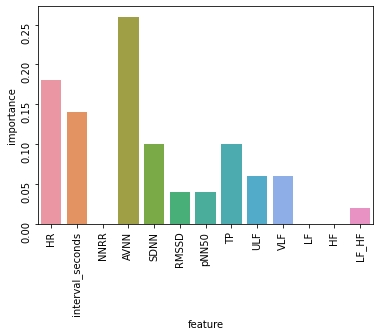

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=importfeature['feature'], y = importfeature['importance'])
plt.tick_params(rotation = 90)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Train your machine learning model using X_train_scaled and y_train
model = model1
model.fit(X_train_scaled, y_train)

# Evaluate the model using X_test_scaled and y_test
accuracy = model.score(X_test_scaled, y_test)
print('Accuracy:', accuracy)


Accuracy: 0.5559105431309904


In [ ]:
X = df[['HR', 'interval_seconds', 'AVNN', 'SDNN', 'TP']]

In [ ]:
X.head()

,HR,interval_seconds,AVNN,SDNN,TP
0,108.329447,0.668183,0.666800,0.006600,0.030690
1,91.074128,0.666800,0.666800,0.006600,0.030690
2,92.201787,0.666800,0.666800,0.006600,0.030690
3,94.776255,0.666800,0.666800,0.006600,0.030690
4,83.305717,0.676691,0.676911,0.030424,0.000548


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2503, 5)
(2503,)
(626, 5)
(626,)


In [ ]:
print(df2.columns)
print()
print(df2.shape)

Index(['HR', 'interval_seconds', 'NNRR', 'AVNN', 'SDNN', 'RMSSD', 'pNN50',
       'TP', 'ULF', 'VLF', 'LF', 'HF', 'LF_HF'],
      dtype='object')

(1000, 13)


In [ ]:
X_train.head()

,HR,interval_seconds,AVNN,SDNN,TP
144,84.522478,0.669757,0.669822,0.080472,0.017705
1854,85.985636,0.712436,0.713498,0.054045,0.016046
1735,82.089949,0.844262,0.843826,0.050792,0.026305
2888,93.478383,0.673715,0.673865,0.027055,0.006697
2654,77.564600,0.635000,0.635657,0.105080,0.163145


In [ ]:
model3 = AdaBoostClassifier()
model3.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
print('train score', model3.score(X_train, y_train))
print('test score', model3.score(X_test, y_test))

train score 0.5801038753495805
test score 0.5543130990415336


In [ ]:
df2 = df2[['HR', 'interval_seconds', 'AVNN', 'SDNN', 'TP']]

In [ ]:
x2test = df2.values
y_pred2 = model3.predict(x2test)

print(y_pred2.shape)
print(y_pred2)

(1000,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 2. 0. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 2. 1. 2. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 2. 0. 2. 1. 0. 1. 1. 0. 1. 2. 0. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 2. 1. 1. 1. 1. 1. 0. 1. 1. 2. 2. 1. 2.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 2. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 2. 1. 1.
 1. 1. 2. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 2. 1. 1. 1. 2.
 1. 2. 1. 1. 1. 2. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 2. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1.
 1. 2. 0. 2. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [ ]:
df2['stress'] = y_pred2
df2[['Id','stress']].to_csv('submission_RF3.csv', index=False)

<ipython-input-83-2db99ea7f36f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['stress'] = y_pred2


KeyError: ignored

# The Assignment 

In [ ]:
# Load the csv files over here into pandas data frame
# YOUR CODE HERE
# 0.1
def load_csv(file_name):
  # Input: csv_file_name
  # Output: pandas data frame

## Part 1 - Data cleaning, normalization and missing value fillup

In [ ]:
def missing_filler1():
  # Take input the raw data and fillup the missing values using first algorithm.
  # YOUR CODE HERE

In [ ]:
def missing_filler2():
  # Take input the raw data and fillup the missing values using second algorithm.
  # YOUR CODE HERE

In [ ]:
def cleaning():
  # Take all the features as input, and do any data cleaning necessary.
  # YOUR CODE HERE

In [ ]:
def normalizer():
  # Taken input the output of cleaning function, and perform data normalization independently for all the features.
  # YOUR CODE HERE

## Part 2 - Model training and testing

In [ ]:
# Splitting the dataset into train, val and test sets.
# 2.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# Code for different models used.

def Model1():
  # You can use the sci-kit learn solver but capture any other hyper-parameter settings
  # or model settings in this method
  # YOUR CODE HERE

def Model2():
  # You can use the sci-kit learn solver but capture any other hyper-parameter settings
  # or model settings in this method
  # YOUR CODE HERE

def Model3():
  # You can use the sci-kit learn solver but capture any other hyper-parameter settings
  # or model settings in this method
  # YOUR CODE HERE

# Please also rename the model functions to reflect what it represents.
# Discuss about the hyper-parameter/model settings in the report.

In [ ]:
# Create function which calculates F1score, precision, recall and accuracy score for true and predicted labels.
def metrics(y_pred, y_true):
  pass
  # Takes input the predicted and true labels.
  # Your code here for precision, recall, F1score, accuracy
  # You can call this code to compute metrics for your models

## Part 3 - Interpretability

In [ ]:
# Look into using suitable functions from sklearn. Explain your code and findings clearly in the report document.
# 3.1
def FeatureImportance():
  # Your code can based on measures of information gain or other feature selection methods
  # Input: k - Number of features to pick
  # Output should be a ranked list of features
  # YOUR CODE HERE

In [ ]:
def FeatureImportanceForPairs():
  # Find the best pairs of features which are useful for making the prediction.
  # HINT: Can be done in a model agnostic way through pair generation and ranking.
  # YOUR CODE HERE

In [ ]:
def dt_top_feat():
    # Find the top 5 decision branches for the decision tree.
    # YOUR CODE HERE